# Analysis of Mercury Levels in Albertan Fish
## Analysis Notebook

### Introduction
Mercury contamination in fish is a significant environmental and public health concern. This notebook presents an in-depth analysis of mercury levels in various fish species across Alberta, with the aim of identifying regions and species exhibiting elevated mercury concentrations.


### Objectives and Research Questions
The investigation focuses on several core questions:
- Which fish species carry the highest mercury levels?
- What patterns emerge in mercury distribution across different Albertan regions?
- Is there evidence of health defects in fish that correlate with mercury exposure?

### Data Source
[Data was sourced](https://open.alberta.ca/opendata/chemical-monitoring-in-local-foods-mercury-in-fish) from the Government of Alberta’s open data portal, with measurements spanning from 1997 to 2020, involving multiple fish species across Alberta's seven distinct regions.

### Scope of Analysis
The analysis encompasses seven regions in Alberta, focusing on metrics such as collection date, species information, sex of the specimens, and recorded mercury levels.

### Limitations
1. The analysis is limited to historical data available up to 2020 and does not include external factors such as water temperature or fish diet that may influence mercury levels.
2. Findings are specific to the Albertan context and may not be generalizable to other areas.
3. The methodologies used for data analysis have inherent limitations that could affect the results.

### Analytical Methods
Descriptive statistics, correlation analysis will be used in pair with visualization techniques to present patterns and insights.

### Expected Outcomes
The aim is to identify potential risk factors in various fish populations in Albertan waterbodies.

### Stakeholders
This analysis will be of interest to environmental agencies, public health officials, anglers, and the scientific community at large.

### Citations and References
Relevant literature and supplementary data sources are cited to provide context and support for the analysis.


## Analysis Process

In [3]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing the cleaned dataset from the Preparation Notebook
df = pd.read_csv("../data/df_clean.csv")

### 1. What species contain the highest level of Hg (mg/kg)?

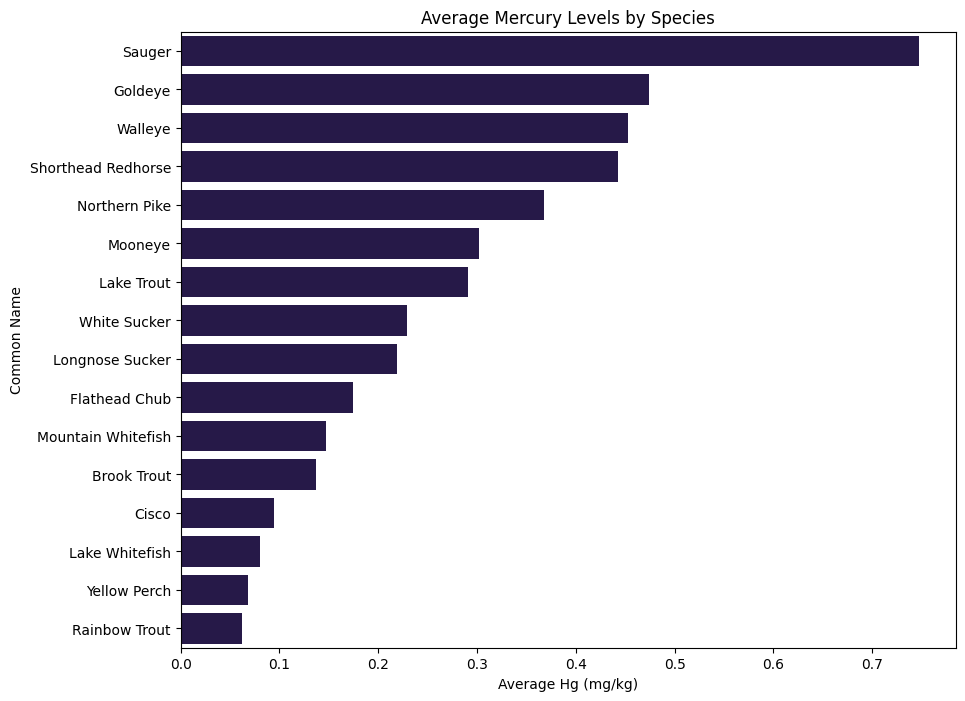

In [49]:
# Calculate the mean Hg (mg/kg) for each species and sort them
species_hg = df.groupby('Common Name')['Hg (mg/kg)'].mean().sort_values(ascending=False)

# Plotting the top species with the highest mercury levels
plt.figure(figsize=(10, 8))
sns.barplot(x=species_hg.values, y=species_hg.index)
plt.xlabel('Average Hg (mg/kg)')
plt.ylabel('Common Name')
plt.title('Average Mercury Levels by Species')
plt.show()


#### Species containing the highest Mercury levels:
1. Sauger
2. Goldeye
3. Walleye
4. Shorthead Redhorse
5. Northern Pike

### 2. Land Use Regions

#### Which regions contain Species of fish that have above average mercury levels?

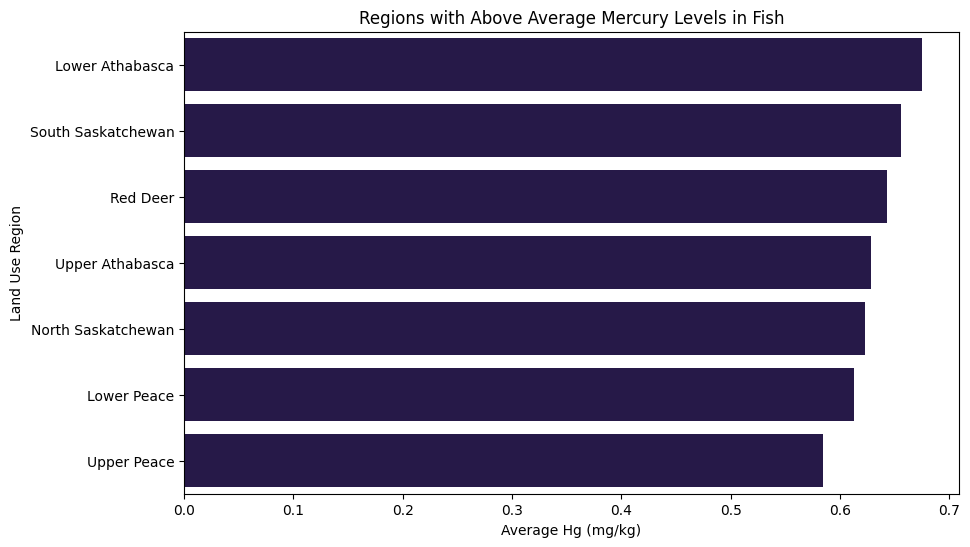

In [53]:
# Calculate the overall average mercury level
average_mercury = df['Hg (mg/kg)'].mean()

# Filter the DataFrame for species above the average mercury level
above_avg_hg = df[df['Hg (mg/kg)'] > average_mercury]

# Group by 'Land Use Region' and calculate the mean
region_hg = above_avg_hg.groupby('Land Use Region')['Hg (mg/kg)'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=region_hg.values, y=region_hg.index)
plt.xlabel('Average Hg (mg/kg)')
plt.ylabel('Land Use Region')
plt.title('Regions with Above Average Mercury Levels in Fish')
plt.show()

#### Regions containing fish with above average Mercury levels:
1. Lower Athabasca
2. South Saskatchewan
3. Red Deer
4. Upper Athabasca
5. North Saskatchewan

####  "What are the average mercury levels in Fish by Region?"

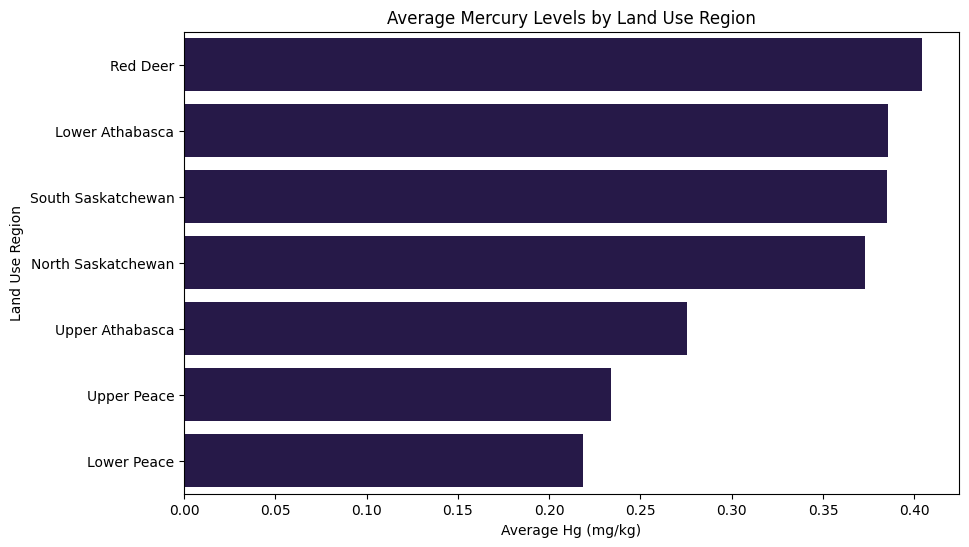

In [52]:
# Calculate the overall average mercury level
average_mercury = df['Hg (mg/kg)'].mean()

# Group by 'Land Use Region' and calculate the mean
region_hg = df.groupby('Land Use Region')['Hg (mg/kg)'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=region_hg.values, y=region_hg.index)
plt.xlabel('Average Hg (mg/kg)')
plt.ylabel('Land Use Region')
plt.title('Average Mercury Levels by Land Use Region')
plt.show()

#### Average Mercury levels in Fish, by Region
1. Red Deer
2. Lower Athabasca
3. South Saskatchewan
4. North Saskatchewan
5. Upper Athabasca

### 3. Do the species with above average Hg (mg/kg) appear to show abnormalities in Fork Length to Total Length growth?

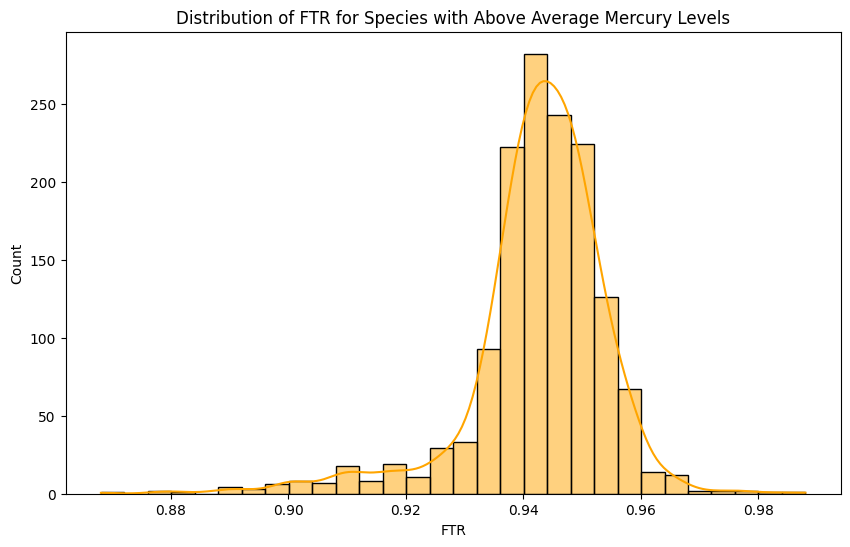

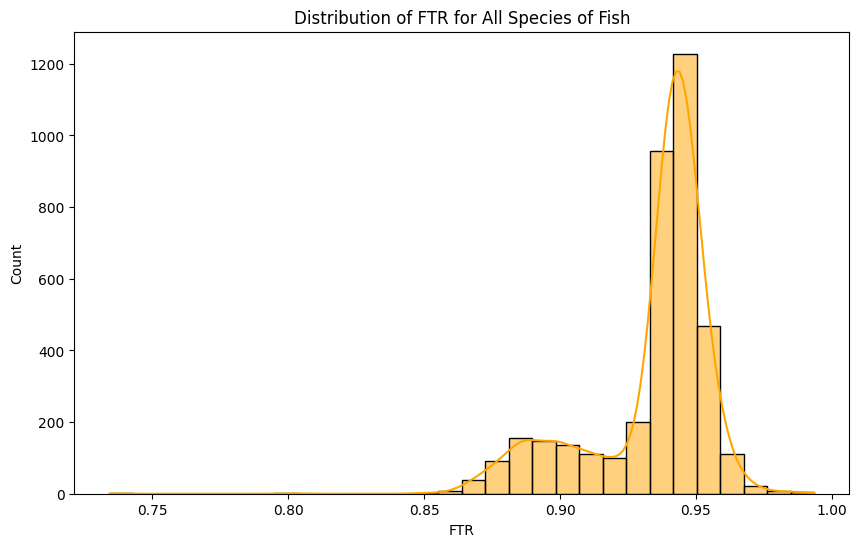

In [45]:
# Create a new column for the Fork to Total Length Ratio (FTR)
df['FTR'] = df['Fork Length (mm)'] / df['Total Length (mm)']

# Calculate the overall average mercury level
average_mercury = df['Hg (mg/kg)'].mean()

# Filter the DataFrame for species above the average mercury level
above_avg_hg = df[df['Hg (mg/kg)'] > average_mercury]

# Plotting the distribution of the ratio for species with above average mercury levels
plt.figure(figsize=(10, 6))
sns.histplot(above_avg_hg['FTR'], kde=True, color='orange', bins=30)
plt.xlabel('FTR')
plt.title('Distribution of FTR for Species with Above Average Mercury Levels')

# Plotting the distribution of the ratio for all species of fish
plt.figure(figsize=(10, 6))
sns.histplot(df['FTR'], kde=True, color='orange', bins=30)
plt.xlabel('FTR')
plt.title('Distribution of FTR for All Species of Fish')
plt.show()


#### Determining Physical Abnormalities due to Mercury concentration in Species

With the information in the dataset, **a clear relationship between the Fork to Total Length ratio and concentrations in Mercury is not apparent.**

For the graph showing the distribution of FTR values for all species of fish, the spread could be due to an indication of various ages, as well as size of species, age, and the diet of each species in their habitat.

#### FTR to Mercury Plots for all Species, Scatterplot

The graph below shows the FTR to Mercury Concentration for all Species, on a scatterplot. 

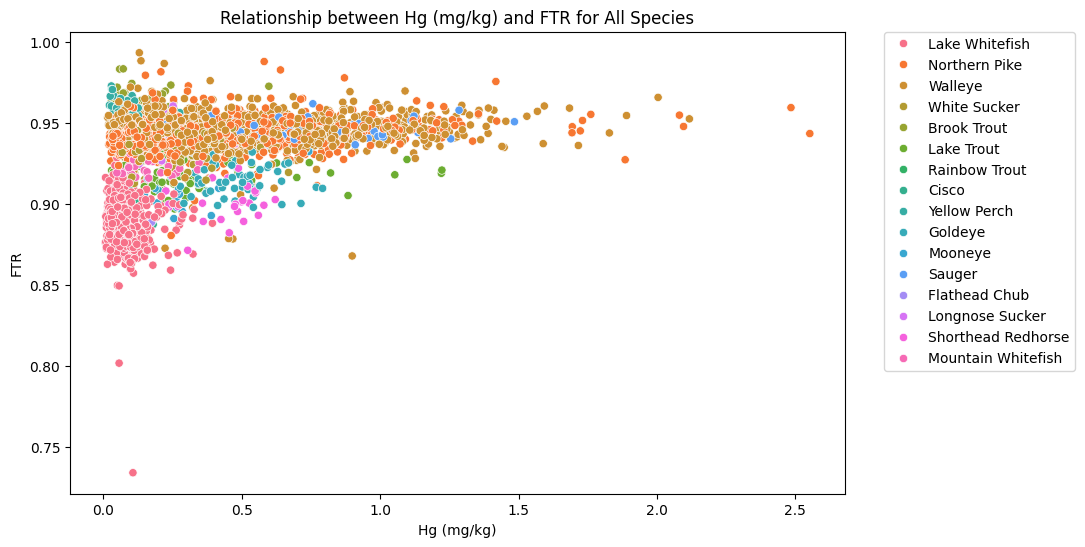

In [71]:
# Creating a consistent color palette for the "Common Name" column
palette = sns.color_palette('husl', n_colors=df['Common Name'].nunique())
color_map = {species: color for species, color in zip(df['Common Name'].unique(), palette)}

# Creating a scatter plot for the relationship between Hg (mg/kg) and FTR, grouped by "Common Name"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hg (mg/kg)', y='FTR', hue='Common Name', data=df, palette=color_map) # Using color map
plt.xlabel('Hg (mg/kg)')
plt.ylabel('FTR')
plt.title('Relationship between Hg (mg/kg) and FTR for All Species')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # To place the legend outside the plot
plt.show()

#### FTR to Mercury Concentrations for each Species, Facet Grid Scatterplot

Each scatter plot in the graph below shows the FTR to Mercury Concentrations for each species on a separate scatterplot. These graphs do not show a clear connection between the two metrics, but does show the counts for each species in this dataset.

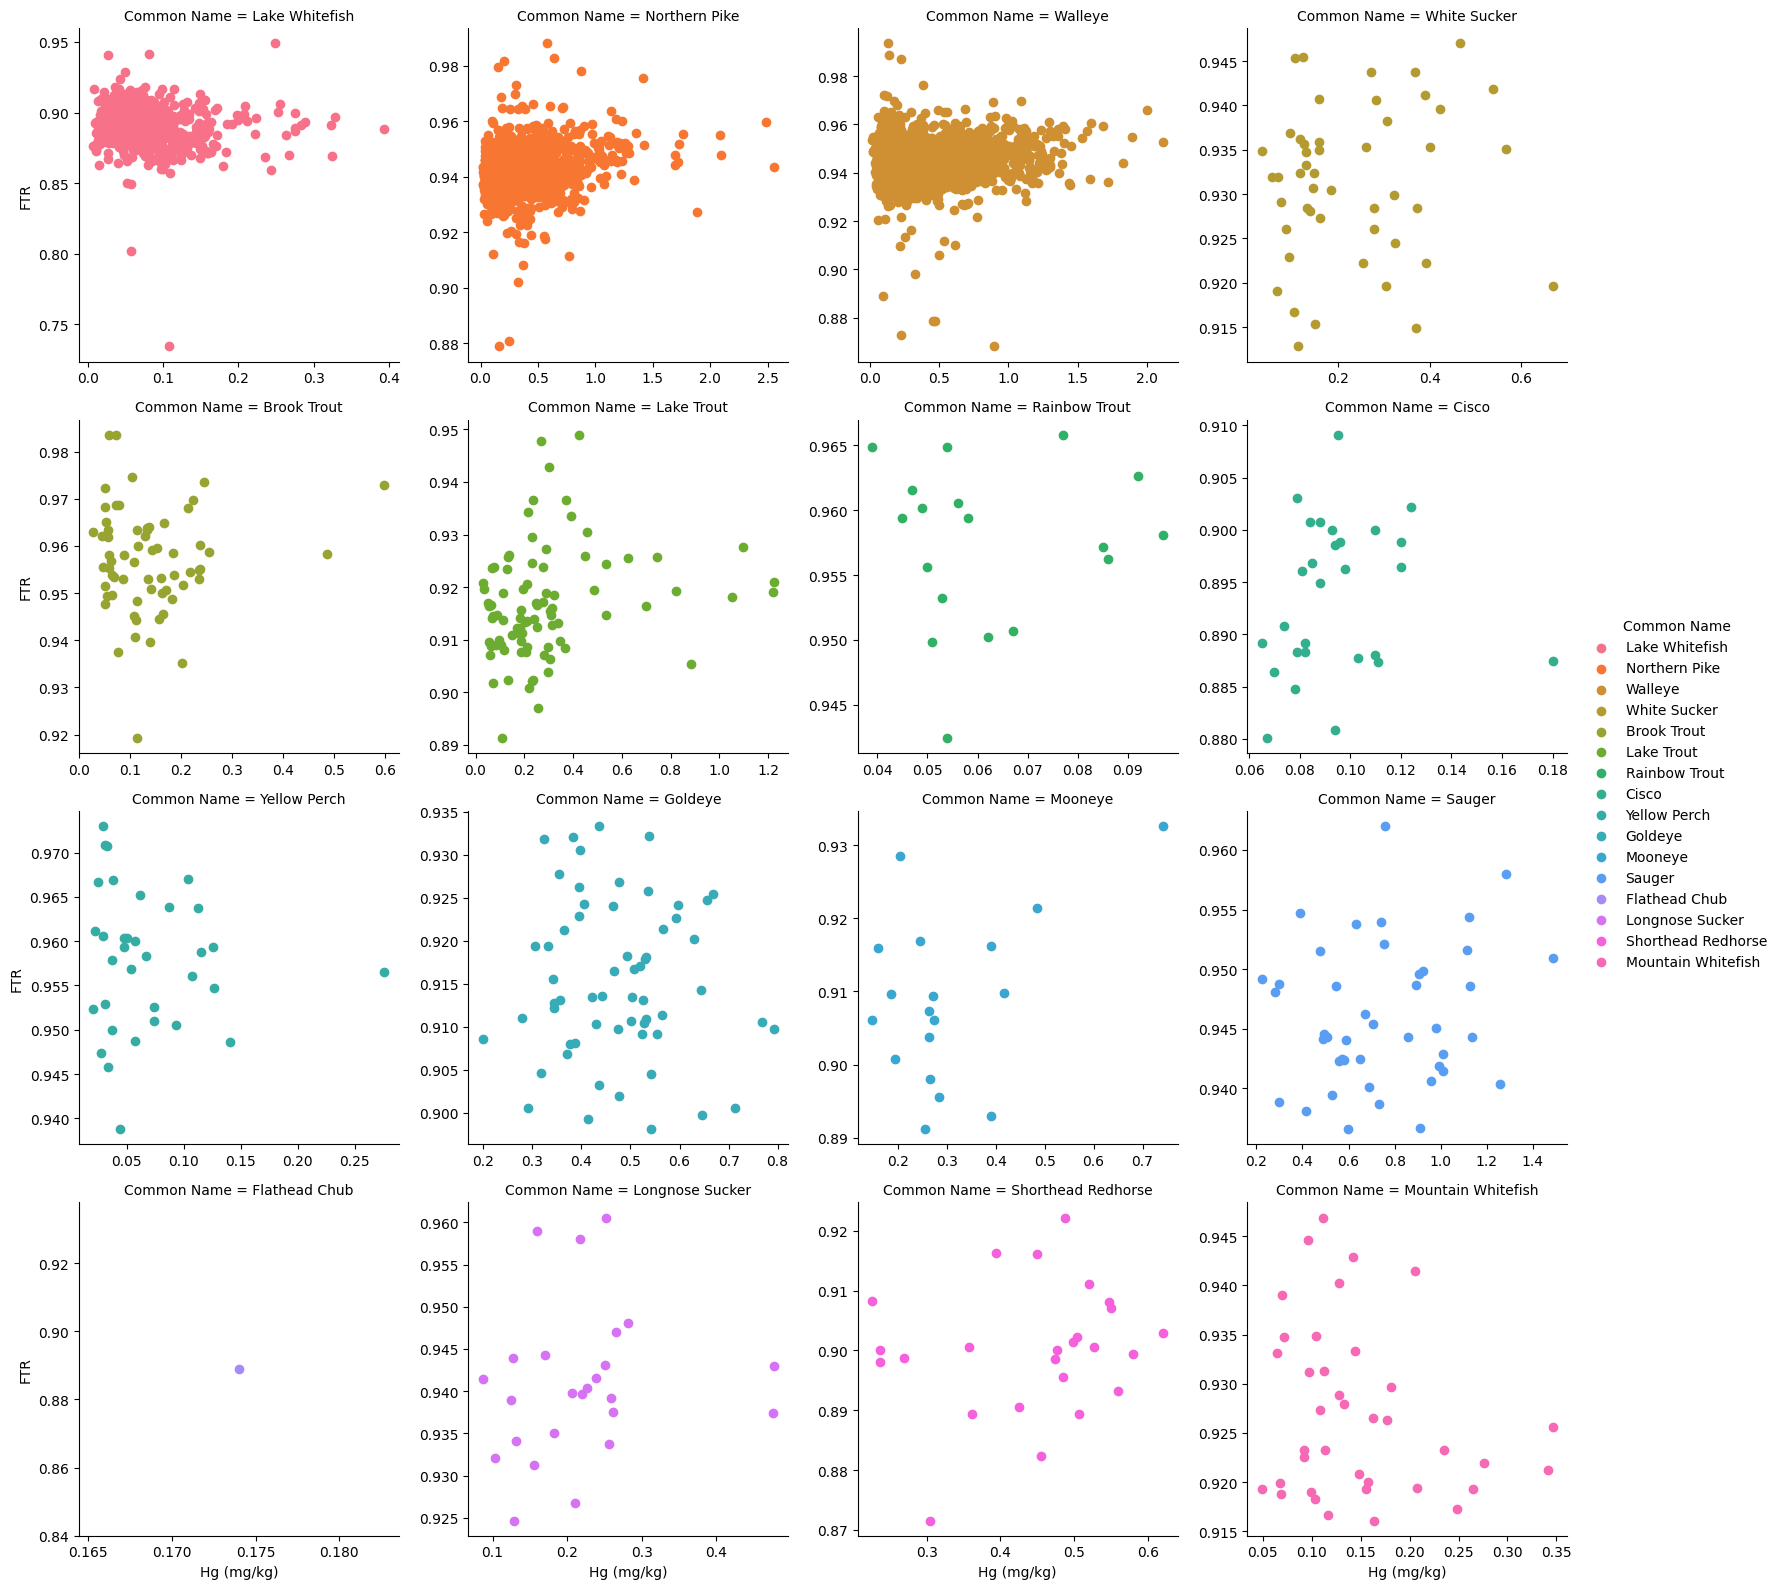

In [70]:
# Using a facet grid to create a scatter plot for each species.
g = sns.FacetGrid(df, col='Common Name', col_wrap=4, height=4, sharex=False, sharey=False, hue='Common Name', palette=color_map)
g.map(plt.scatter, 'Hg (mg/kg)', 'FTR')
g.add_legend()  # Add a legend to the grid
g.set_axis_labels('Hg (mg/kg)', 'FTR')  # Set the axis labels
plt.show()


#### Results 

**Positive Correlations — Represented by species like Mooneye (0.418705).**
- These correlations say that higher mercury levels often correspond with increased FTR.

**Negative Correlations — Seen with species like Mountain Whitefish (-0.223955).**
- Here, higher mercury levels correspond with a decline in FTR.

**Neutral Correlations — Example: Brook Trout (0.053466).**
- These species show virtually no relationship between mercury levels and FTR.

**NaN Correlations — Like Flathead Chub.**
- Indicative of insufficient data or no variance in mercury and FTR levels.

**These coefficients hint at possible relationships, not causation. 
Non-linear associations and correlations closer to zero may need further exploration.**

### Additional Explorations

For further exploration, I want to see which Species were tested from various regions.

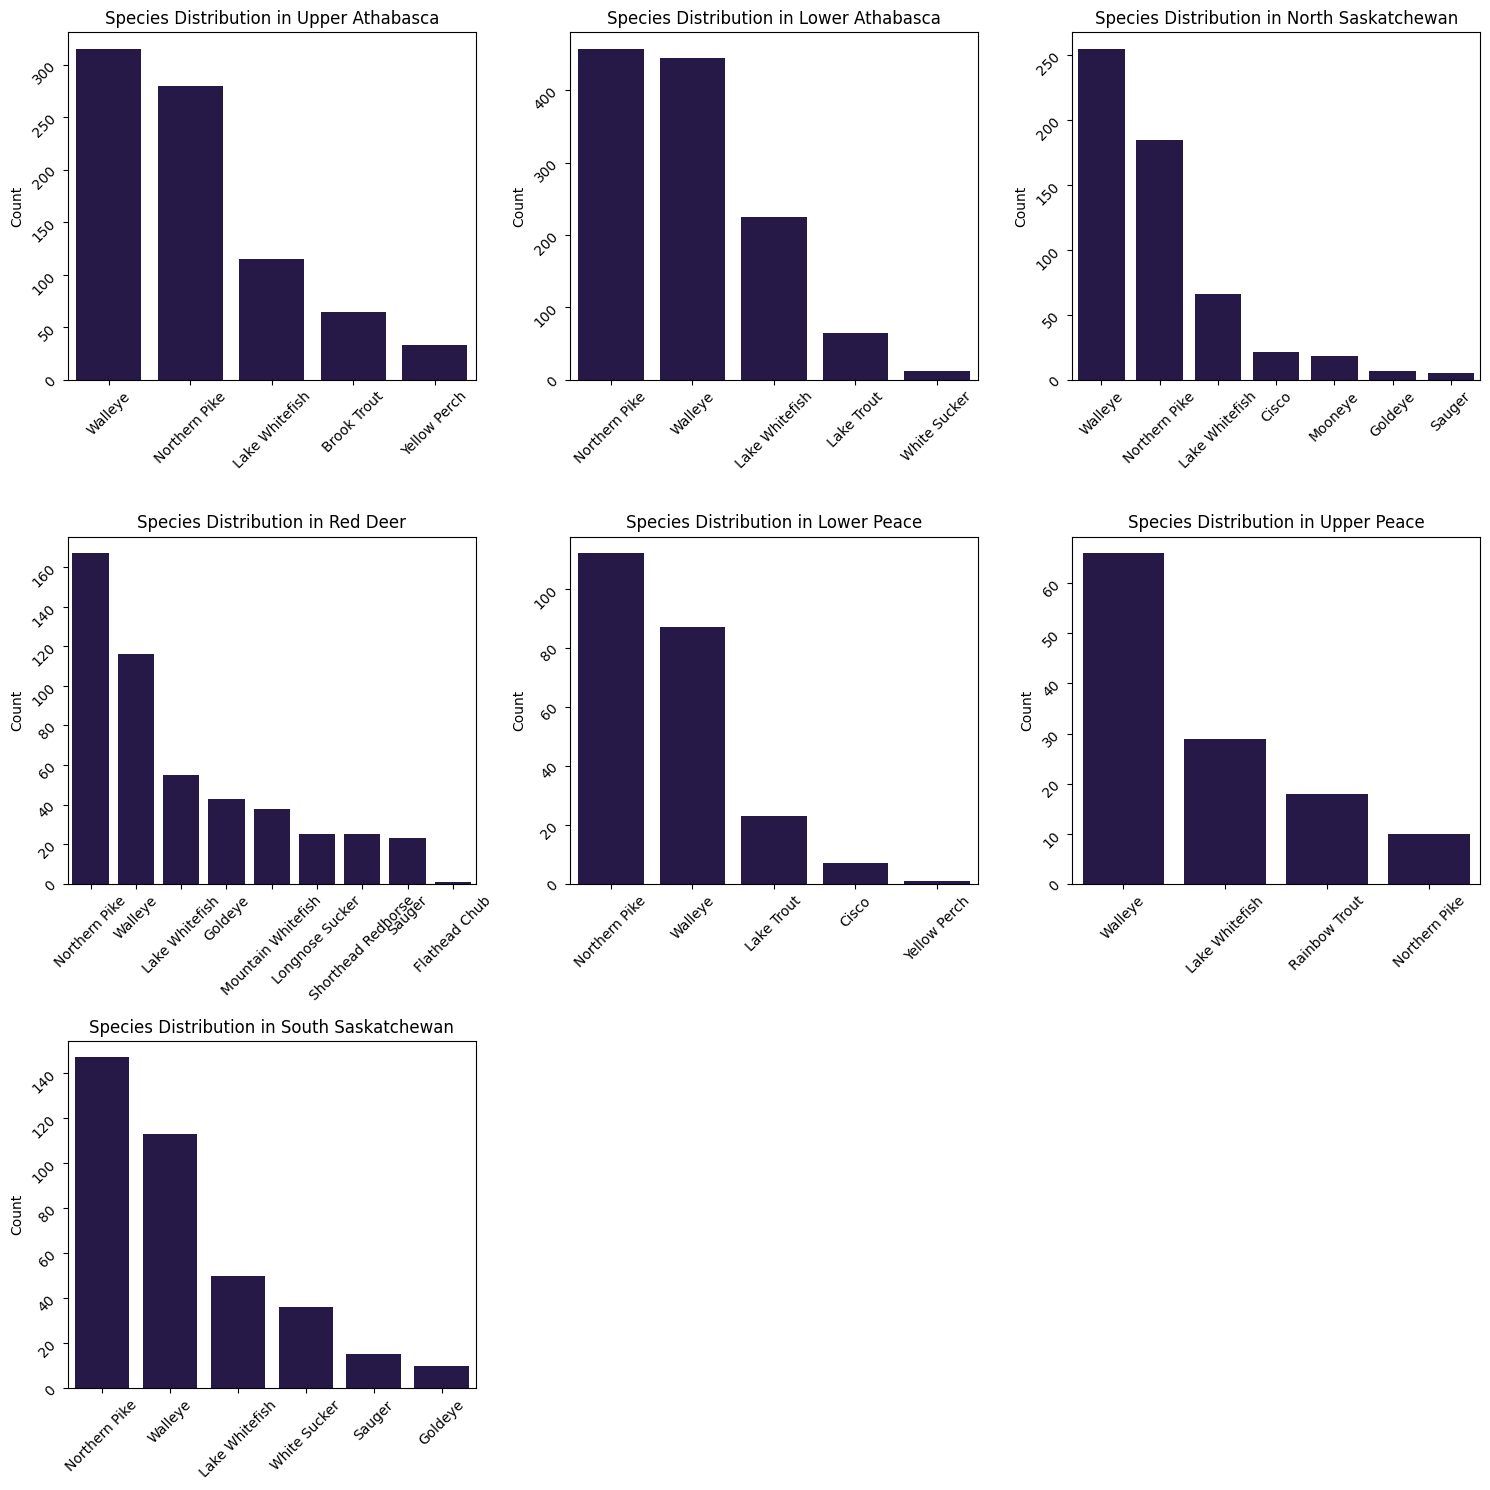

In [69]:
land_use_regions = df['Land Use Region'].unique() # Get the unique values of 'Land Use Region'

# Layout of grid
num_columns = 3 
num_rows = 3

# Set up the matplotlib figure for the subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows*5))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Iterate over each region to create a bar plot
for i, region in enumerate(land_use_regions):
    # Filter the DataFrame for the current region
    df_region = df[df['Land Use Region'] == region]
    
    # Get the counts of 'Common Name' for the current region
    df_counts = df_region['Common Name'].value_counts().reset_index()
    df_counts.columns = ['Common Name', 'Count']
    
    # Create the bar plot in the ith subplot
    sns.barplot(data=df_counts, x='Common Name', y='Count', ax=axes[i])
    
    # Set the title with the current region
    axes[i].set_title(f'Species Distribution in {region}')
    axes[i].tick_params(labelrotation=45)  # Rotate x labels for better readability if needed
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Hide any unused axes if the number of plots is less than the number of subplots
for j in range(i+1, num_columns*num_rows):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()
plt.show()
